In [ ]:
# Downloading datasets
!rm -rf t*
!wget https://raw.githubusercontent.com/SreeBhagya-S/Synthetic-Manglish-Corpus/main/Datasets/amazon_rvs.csv;

--2022-11-09 06:26:26--  https://raw.githubusercontent.com/SreeBhagya-S/Datasets/main/amazon_rvs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17345995 (17M) [text/plain]
Saving to: ‘amazon_rvs.csv’

amazon_rvs.csv      100%[===================>]  16.54M  --.-KB/s    in 0.06s   

2022-11-09 06:26:26 (300 MB/s) - ‘amazon_rvs.csv’ saved [17345995/17345995]



In [ ]:
import pandas as pd   
import sys 
import os
import csv
import string

In [ ]:
df = pd.read_csv('/content/amazon_rvs.csv',  sep=',')
#df

In [ ]:
# Creates pandas DataFrame.  
df_e_reviews = pd.DataFrame(columns=['e_reviews'])  
df_e_reviews.drop(df_e_reviews.index, inplace=True)
selected_columns = df[["reviews.text"]] 
df_e_reviews=selected_columns.copy()
df_e_reviews = df_e_reviews.dropna(axis=0).reset_index(drop=True)

df_e_reviews

,reviews.text
0,This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...
...,...
34654,This is not appreciably faster than any other ...
34655,Amazon should include this charger with the Ki...
34656,Love my Kindle Fire but I am really disappoint...
34657,I was surprised to find it did not come with a...


In [ ]:
with open('/content/amazon_trans_malayalamreviews.csv', 'w') as file:
   pass 
print("Empty File Created Successfully")

def write_to_csv(list_of_tokens):
     with open('/content/amazon_trans_malayalamreviews.csv', 'w', newline='') as csvfile:
         writer = csv.writer(csvfile)
         writer.writerows(list_of_tokens)

Empty File Created Successfully


In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
with open('/content/amazon_google_trans_malayalamreviews.csv', 'w') as file:
   pass 
print("Empty File Created Successfully")



Empty File Created Successfully


In [ ]:
headers = ['REVIEW_TEXT']
df_trans = pd.DataFrame(index=range(0,len(df_e_reviews)), columns=headers)
df_trans.drop(df_trans.index, inplace=True)


In [ ]:
f = open("/content/amazon_google_trans_malayalamreviews.csv", "w")
f.truncate()
f.close()
for i,row in enumerate(df_e_reviews['reviews.text']):
    trans_text=translator.translate(row,dest='ml')  
    #print(trans_text.text)
    df_trans.loc[len(df_trans)] = trans_text.text
#print(df_trans)
df_trans.to_csv("/content/amazon_google_trans_malayalamreviews.csv")

In [ ]:
df_trans

,REVIEW_TEXT
0,ഈ ഉൽപ്പന്നം ഇതുവരെ നിരാശപ്പെടുത്തിയിട്ടില്ല. എ...
1,തുടക്കക്കാരനോ പരിചയസമ്പന്നനോ ആയ വ്യക്തിക്ക് മി...
2,അയാൾക്ക് ഉപയോഗിക്കാനും പഠിക്കാനുമുള്ള ചെലവുകുറ...
3,"എന്റെ ഫയർ എച്ച്‌ഡി 8 ഇപ്പോൾ രണ്ടാഴ്‌ചയുണ്ട്, എ..."
4,എന്റെ കൊച്ചുമകൾ സന്ദർശിക്കാൻ വരുമ്പോൾ ഞാൻ ഇത് ...
...,...
34654,"എന്റെ കിൻഡിൽ, കിൻഡിൽ ഫയർ, കിൻഡിൽ ഫയർ എച്ച്‌ഡി,..."
34655,കിൻഡിലിനൊപ്പം ആമസോൺ ഈ ചാർജർ ഉൾപ്പെടുത്തണം. ഉൾപ...
34656,"എന്റെ കിൻഡിൽ ഫയർ ഇഷ്ടപ്പെടുന്നു, പക്ഷേ കിൻഡിൽ ..."
34657,ഒരു തരത്തിലുള്ള ചാർജിംഗ് കോഡുകളുമായും ഇത് വന്ന...


In [ ]:
headers = ['REVIEW_TEXT']
df_trans = pd.DataFrame(index=range(0,len(df_e_reviews)), columns=headers)
df_trans.drop(df_trans.index, inplace=True)
df_trans = pd.read_csv('/content/amazon_google_trans_malayalamreviews.csv',sep=',', usecols = ['REVIEW_TEXT'])
df_trans

In [ ]:
df_reviews=pd.concat([df_e_reviews, df_trans], axis=1,ignore_index=True, sort=False)
df_reviews.columns = ['english_reviews', 'malayalam_reviews']
df_reviews

,english_reviews,malayalam_reviews
0,This product so far has not disappointed. My c...,ഈ ഉൽപ്പന്നം ഇതുവരെ നിരാശപ്പെടുത്തിയിട്ടില്ല. എ...
1,great for beginner or experienced person. Boug...,തുടക്കക്കാരനോ പരിചയസമ്പന്നനോ ആയ വ്യക്തിക്ക് മി...
2,Inexpensive tablet for him to use and learn on...,അയാൾക്ക് ഉപയോഗിക്കാനും പഠിക്കാനുമുള്ള ചെലവുകുറ...
3,I've had my Fire HD 8 two weeks now and I love...,"എന്റെ ഫയർ എച്ച്‌ഡി 8 ഇപ്പോൾ രണ്ടാഴ്‌ചയുണ്ട്, എ..."
4,I bought this for my grand daughter when she c...,എന്റെ കൊച്ചുമകൾ സന്ദർശിക്കാൻ വരുമ്പോൾ ഞാൻ ഇത് ...
...,...,...
34654,This is not appreciably faster than any other ...,"എന്റെ കിൻഡിൽ, കിൻഡിൽ ഫയർ, കിൻഡിൽ ഫയർ എച്ച്‌ഡി,..."
34655,Amazon should include this charger with the Ki...,കിൻഡിലിനൊപ്പം ആമസോൺ ഈ ചാർജർ ഉൾപ്പെടുത്തണം. ഉൾപ...
34656,Love my Kindle Fire but I am really disappoint...,"എന്റെ കിൻഡിൽ ഫയർ ഇഷ്ടപ്പെടുന്നു, പക്ഷേ കിൻഡിൽ ..."
34657,I was surprised to find it did not come with a...,ഒരു തരത്തിലുള്ള ചാർജിംഗ് കോഡുകളുമായും ഇത് വന്ന...


In [ ]:
with open('/content/amazon_eng_mal_parallelreviews.csv', 'w') as file:
   pass 
print("Empty File Created Successfully")
f = open("/content/amazon_eng_mal_parallelreviews.csv", "w")
f.truncate()
f.close()

Empty File Created Successfully


In [ ]:

df_reviews.to_csv("/content/amazon_eng_mal_parallelreviews.csv")

In [ ]:
df_e = pd.DataFrame(columns=['e_sentence_count','e_sentence_length'])  
df_e['e_sentence_count'] = df_reviews['english_reviews'].str.count('[\w][\.!\?]').clip(lower=1)
print ("Max len of review text\n",max(df_e['e_sentence_count']))
df_e['e_sentence_length'] = df_reviews.english_reviews.str.split().str.len()
print ("Max no of words in a review text\n",max(df_e['e_sentence_length']))
Total_senetence = df_e['e_sentence_count'].sum()
total_words= df_e['e_sentence_length'].sum()

print ("\ntotal number of sentences in english dataset",Total_senetence)

print ("\ntotal number of words in english dataset",total_words)

Max len of review text
 108
Max no of words in a review text
 1858

total number of sentences in english dataset 88164

total number of words in english dataset 1052786


In [ ]:
df_m = pd.DataFrame(columns=['mal_sentence_count','mal_sentence_length']) 
df_m['mal_sentence_count'] = df_reviews['malayalam_reviews'].str.count('[\w][\.!\?]').clip(lower=1)
print ("Max len of malayalam review text\n",max(df_m['mal_sentence_count']))
df_m['mal_sentence_length'] = df_reviews.malayalam_reviews.str.split().str.len()
print ("Max no of words in a malayalam review text\n",max(df_m['mal_sentence_length']))
Total_m_senetence = df_m['mal_sentence_count'].sum()
total_m_words= df_m['mal_sentence_length'].sum()

print ("\ntotal number of sentences in malayalam dataset",Total_m_senetence)

print ("\ntotal number of words in malayalam dataset",total_m_words)

Max len of malayalam review text
 27
Max no of words in a malayalam review text
 1356

total number of sentences in malayalam dataset 37833

total number of words in malayalam dataset 730023


In [ ]:
import matplotlib.pyplot as plt

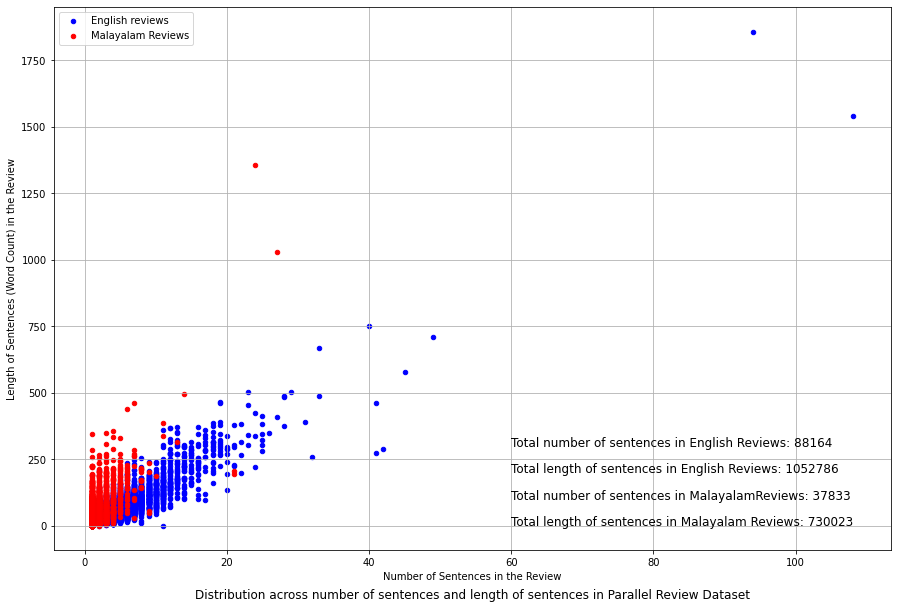

In [ ]:
df = pd.concat([df_e, df_m], axis = 1)
ax1 = df.plot(kind='scatter', x='e_sentence_count', y='e_sentence_length', color='b',figsize=(15,10), grid=True,label="English reviews")    
ax2 = df.plot(kind='scatter', x='mal_sentence_count', y='mal_sentence_length', color='r', ax=ax1,figsize=(15,10), grid=True,label="Malayalam Reviews") 
# Add title and axis names
plt.title('Distribution across number of sentences and length of sentences in Parallel Review Dataset', y=-0.10,fontsize=12)
plt.xlabel('Number of Sentences in the Review')
plt.ylabel('Length of Sentences (Word Count) in the Review')
#plt1.text(20, 114,r"$Total_senetence$",horizontalalignment='center', fontsize=10)
ax1.text(60, 300, r"Total number of sentences in English Reviews: "+str(Total_senetence), fontsize=12)
ax1.text(60, 200, r"Total length of sentences in English Reviews: "+str(total_words), fontsize=12)
ax1.text(60, 100, r"Total number of sentences in MalayalamReviews: "+str(Total_m_senetence), fontsize=12)
ax1.text(60, 0, r"Total length of sentences in Malayalam Reviews: "+str(total_m_words), fontsize=12)
#plt1.annotate("Total Number of English Sentences {}".format(Total_senetence),"Total Number of Malayalam Sentences{}".format(Total_m_senetence)")
#plt.legend(")
# the plot gets saved to 'EnglishReview_dataset.png'
plt.savefig("/content/ParallelReview_dataset.jpg")
plt.show()


In [ ]:
df_m_tokens = pd.DataFrame(columns=['mal_tokens'])  
df_e_tokens = pd.DataFrame(columns=['eng_tokens'])  

In [ ]:
!pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 4.2 MB/s 
     |████████████████████████████████| 2.8 MB 11.4 MB/s 


In [ ]:
from indicnlp.tokenize import indic_tokenize  
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
def e_tokenize(es):
  es=es.lower()
  es= es.translate(str.maketrans('', '', string.punctuation))
  e_token=[]
  #indic_string=clean_text(text)
  
  for t in indic_tokenize.trivial_tokenize(es): 
    #print(t)
    #e_token=en_tokens.split(',')
    e_token.append(t)
    #df_e_tokens.loc[len(df_e_tokens)] = e_token
  return e_token

refs = []
for i,row in enumerate(df_reviews.english_reviews):
  refs.append(e_tokenize(row))

def m_tokenize(ms):
  input_text = ms.translate(str.maketrans('', '', string.punctuation))
  factory=IndicNormalizerFactory()
  normalizer=factory.get_normalizer("ml",remove_nuktas=True)
  output_text=normalizer.normalize(input_text)
  m_token=[]
  for t in indic_tokenize.trivial_tokenize(output_text): 
    m_token.append(t)
  return(m_token)

mal = []
for i,row in enumerate(df_reviews.malayalam_reviews):
  mal.append(m_tokenize(row))

In [ ]:
df_m_tokens.drop(df_m_tokens.index, inplace=True)
df_e_tokens.drop(df_e_tokens.index, inplace=True)
for i,row in enumerate(df_reviews.english_reviews):
  es=row
  e_tokens=[]
  ########## Tokenize English Reviews
  e_tokens.append(e_tokenize(es))
  e_tokens=(','.join(str(a)for a in e_tokens))
  df_e_tokens.loc[len(df_e_tokens)] = e_tokens

  ms=df_reviews.malayalam_reviews[i]
  m_tokens=[]
  ########## Tokenize Malayalam Reviews
  m_tokens.append(m_tokenize(ms)) 
  m_tokens=(','.join(str(a)for a in m_tokens))
  #print('Tokens: ',m_tokens)
  df_m_tokens.loc[len(df_m_tokens)] = m_tokens

In [ ]:
df_e_tokens['eng_tokens']=df_e_tokens['eng_tokens'].str.strip('[]').astype(str)
df_m_tokens['mal_tokens']=df_m_tokens['mal_tokens'].str.strip('[]').astype(str)

In [ ]:
with open('/content/amazon_Review_Paralleltokens.csv', 'w') as file:
   pass 
print("Empty File Created Successfully")

def write_to_csv(list_of_tokens):
     with open('/content/amazon_Review_Paralleltokens.csv', 'w', newline='') as csvfile:
         writer = csv.writer(csvfile)
         writer.writerows(list_of_tokens)

In [ ]:
df_tokens = pd.concat([df_e_tokens, df_m_tokens], axis = 1)
df_tokens.to_csv(r'/content/amazon_Review_Paralleltokens.csv', index = False, header=True)


In [ ]:
#df_tokens = pd.DataFrame(columns=['eng_tokens','mal_tokens'])  
df_tokens=pd.read_csv('/content/amazon_Review_Paralleltokens.csv')

In [ ]:
df_tokens

,eng_tokens,mal_tokens
0,"'this', 'product', 'so', 'far', 'has', 'not', ...","'ഈ', 'ഉൽപ്പന്നം', 'ഇതുവരെ', 'നിരാശപ്പെടുത്തിയി..."
1,"'great', 'for', 'beginner', 'or', 'experienced...","'തുടക്കക്കാരനോ', 'പരിചയസമ്പന്നനോ', 'ആയ', 'വ്യക..."
2,"'inexpensive', 'tablet', 'for', 'him', 'to', '...","'അയാൾക്ക്', 'ഉപയോഗിക്കാനും', 'പഠിക്കാനുമുള്ള',..."
3,"'ive', 'had', 'my', 'fire', 'hd', '8', 'two', ...","'എന്റെ', 'ഫയർ', 'എച്ച്ഡി', '8', 'ഇപ്പോൾ', 'രണ്..."
4,"'i', 'bought', 'this', 'for', 'my', 'grand', '...","'എന്റെ', 'കൊച്ചുമകൾ', 'സന്ദർശിക്കാൻ', 'വരുമ്പോ..."
...,...,...
34654,"'this', 'is', 'not', 'appreciably', 'faster', ...","'എന്റെ', 'കിൻഡിൽ', 'കിൻഡിൽ', 'ഫയർ', 'കിൻഡിൽ', ..."
34655,"'amazon', 'should', 'include', 'this', 'charge...","'കിൻഡിലിനൊപ്പം', 'ആമസോൺ', 'ഈ', 'ചാർജർ', 'ഉൾപ്പ..."
34656,"'love', 'my', 'kindle', 'fire', 'but', 'i', 'a...","'എന്റെ', 'കിൻഡിൽ', 'ഫയർ', 'ഇഷ്ടപ്പെടുന്നു', 'പ..."
34657,"'i', 'was', 'surprised', 'to', 'find', 'it', '...","'ഒരു', 'തരത്തിലുള്ള', 'ചാർജിംഗ്', 'കോഡുകളുമായു..."


**Parse Tree**

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 5.4 MB/s 


In [ ]:
# Import required libraries
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize, RegexpParser
  
#Extract all parts of speech from any text
chunker = RegexpParser("""
                       NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases
                       P: {<IN>}               #To extract Prepositions
                       V: {<V.*>}              #To extract Verbs
                       PP: {<p> <NP>}          #To extract Prepositional Phrases
                       VP: {<V> <NP|PP>*}      #To extract Verb Phrases
                       """)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#Libraries to draw parse tree

from matplotlib.pyplot import *
from matplotlib.widgets import *
from math import *
from random import *
from numpy import *
from tkinter import *

!apt-get install python3-tk
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.
%matplotlib inline
from nltk.tree import Tree
from IPython.display import display

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 785 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.11 [785 kB]
Fetched 785 kB in 0s (6,931 kB/s)
Selecting previously unselected package xvfb.
(Reading 

**NE recognition**

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 15.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b97f7628919308520968046196ce6f776a37b03188dc0cd77d61c0249f138e77
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
!python -m spacy download en_core_web_lg

2022-11-22 04:21:50.804352: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 16 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import langdetect
from langdetect import detect
nlp={}    
for lang in ["en"]: # Fill in the languages you want, hopefully they are supported by spacy.
    if lang == "en":
        nlp[lang]=spacy.load(lang + '_core_web_lg')
    else: 
        nlp[lang]=spacy.load(lang + '_core_news_lg')
        
nlp = spacy.load("en_core_web_lg")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

**LaBSE Alignments**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 21.3 MB/s 
     |████████████████████████████████| 7.6 MB 42.0 MB/s 
     |████████████████████████████████| 182 kB 59.7 MB/s 


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from array import array
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
## utility functions 
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    #return sum_embeddings / sum_mask
    return token_embeddings


def load_model(name,do_lower_case=False):
    tokenizer = AutoTokenizer.from_pretrained(name,do_lower_case=False)
    model = AutoModel.from_pretrained(name)
    return model,tokenizer


def calc_embeddings(model,tokenizer,sentences):
    encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask']).numpy()
    #token_embeddings = mean_pooling(model_output, encoded_input['attention_mask']).numpy()
    return sentence_embeddings

def plot_similarity(sentence_embeddings):
    labels = ['Sent1_en','Sent1_ml']
    sns.set(font_scale=1.2)
    similarity = (1+cosine_similarity(sentence_embeddings))/2
    plt.figure(figsize=(14,14))
    ax = sns.heatmap(similarity, linewidth=0.5,annot=True,xticklabels= labels, yticklabels=labels)
    plt.show()
  

In [ ]:
model_name = "pvl/labse_bert" # for mbert use bert-base-multilingual-cased
model,tokenizer = load_model(name=model_name)

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

Some weights of the model checkpoint at pvl/labse_bert were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:

cm_tokens=[]


df_tokens['cm_tokens']=''
e_tokens=[]
m_tokens=[]
e=0
m=0

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
start = time.time()
for tr in range(len(df_tokens)):
  print("\n************************************************In row",tr,"************************************************\n")
  e_tokens=[]
  m_tokens=[]
  e=0
  m=0
  e_tokens=df_tokens.eng_tokens[tr].split(",")
  #print("\ne_tokens",e_tokens)
  english_tokens=df_tokens['eng_tokens'].astype(str)
  engl_tokens=english_tokens[tr]
  m_tokens=df_tokens.mal_tokens[tr].split(",")
  e=len(e_tokens)
  m=len(m_tokens)
  cm_tokens_m=m_tokens.copy()
  cm_tokens_e=e_tokens.copy()
 
  #calculate labse embeddings for each review tokens
  labse_e_embeddings=calc_embeddings(model,tokenizer,e_tokens)
  print("\nEng embeddings:\n",labse_e_embeddings.shape)
  labse_m_embeddings=calc_embeddings(model,tokenizer,m_tokens)
  print("\nMal  embeddings:\n",labse_m_embeddings.shape)
  alignment_matrix = pd.DataFrame(columns=["e_index","m_index","sim_score"], index =[e_tokens]) 

  for i in range(e):
    max = -1
    e_index=0
    m_index=0
    for j in range(len(m_tokens)):
      score=cosine_similarity(np.array(labse_e_embeddings[i][0].tolist()).reshape(1,-1),np.array(labse_m_embeddings[j][0].tolist()).reshape(1,-1))
      #print("****\n",score,"\n")
      if float(score) > max:
          max = float(score)
          e_index=i
          m_index=j
    alignment_matrix.iat[i,0]=e_index
    alignment_matrix.iat[i,1]=m_index
    alignment_matrix.iat[i,2]=max
  print("\n",''.join(df_tokens.eng_tokens[tr]))
  print("\n",''.join(df_tokens.mal_tokens[tr]))
  print("\n",alignment_matrix)

  target = {39:None, 91:None , 93:None} 
  en_tokens=(str(e_tokens).translate(target))
  eng_tokens=en_tokens.split(',')

  # Find all parts of speech in above sentence
  es=df_reviews.english_reviews[tr]
  es= es.translate(str.maketrans('', '', string.punctuation))
  tagged = pos_tag(word_tokenize(es.lower()))
  parsed = chunker.parse(tagged)
  l=[]
  l=parsed.leaves()
  print(l) 
  tree = Tree.fromstring(str(parsed))
  e_tokens=df_tokens.eng_tokens[tr].split(",") 
  leng=len(e_tokens)
  for k in range(len(l)):
    f=-1
    try:
      if l[k][0]!='’' and l[k][0]!='t' and l[k][0]!='ta' and (l[k][1] == 'JJ'or l[k][1] == 'NN'or l[k][1] == 'CC'):
        w=str(l[k][0])
        if k==0 and leng==1:
         w= "['{}']".format(w)
        elif k==0 and leng==2:
         w= "['{}'".format(w)
        elif k==0 and leng>2:
          w="['{}'".format(w)
        elif leng<=(len(l)-1) and k==(len(l)-1):
         w=" '{}']".format(w)
        elif k==(len(l)-1) and leng<=(len(l)):
          w=" '{}']".format(w)
        else:
          w=" '{}'".format(w)
       #print(e_tokens.index(w))
        f=e_tokens.index(w) 
    except ValueError:
            pass 

    for row in alignment_matrix.itertuples():
      if row.e_index==f:
        j=row.m_index
        insert="{}".format(e_tokens[f])
            
  print("\nAfter Phrases changed:",cm_tokens_m,"\n")

  print("Changing some NEs\n")
  es=df_reviews.english_reviews[tr]
  es= es.translate(str.maketrans('', '', string.punctuation))
  nes = nlp(es.lower())

  print("\nNES using nlp()\n",nes)
  e_tokens=','.join(e_tokens)
  loop=0
  leng=len(e_tokens)
  for ent in nes.ents:
    print("\nNEs:\n",ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))
    t=ent.text
    if loop==0 and leng==1:
      t= "'{}'".format(t)
    elif loop==0 and leng!=1:
      t="'{}'".format(t)
    elif loop==(leng-1):
      t=" '{}'".format(t)
    else:
      t=" '{}'".format(t)  
    try:
      f=e_tokens.index(t)
      for row in alignment_matrix.itertuples():
        if row.e_index==f:
          j=row.m_index
          insert="{}".format(e_tokens[f])
          cm_tokens_m[j]=str(insert)
    except ValueError:
            pass  # Could happen in face of bad user input
    loop+=1
  print("\n",cm_tokens_m)
    
  print("\nChanging some NEs\n")
  print("\nNES using nltk\n",nes)
  e_tokens=df_tokens.eng_tokens[tr].split(",") 
  leng=len(e_tokens)
  # Find all parts of speech in above sentence
  d=0
  es=df_reviews.english_reviews[tr]
  es= es.translate(str.maketrans('', '', string.punctuation))
  loop=0
  for sent in nltk.sent_tokenize(es):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
          print("\nNER ...")
          print(chunk.label(),' '.join(c[0] for c in chunk))
          t1=(chunk.leaves(),' '.join(c[0] for c in chunk))
          t=t1[1].lower()
          #print("searching for ......\n",t)
          if loop==0 and leng==1:
            t= "'{}'".format(t)
          elif loop==0 and leng!=1:
            t="'{}'".format(t)
          elif loop==(leng-1):
            t=" '{}'".format(t)
          else:
            t=" '{}'".format(t)    
          try:
            d=e_tokens.index(t)
            print("\n",t,"found at index",d)    
            for row in alignment_matrix.itertuples():
              if row.e_index==d:
                j=row.m_index
                insert="{}".format(e_tokens[d])
                cm_tokens_m[j]=str(insert)
          except ValueError:
            pass  # Could happen in face of bad user input
        loop+=1 

  print("\n",cm_tokens_m)
  df_tokens.cm_tokens[tr]= cm_tokens_m

end = time.time()
# show time of execution 
print(f"\tTime taken: {(end-start)*10**3:.03f}ms")


Streaming output truncated to the last 5000 lines.
 (169, 7, 768)

Mal  embeddings:
 (120, 12, 768)

 'as', 'my', 'grandparents', 'love', 'to', 'watch', 'japanese', 'tv', 'live', 'stream', 'local', 'japanese', 'channels', 'and', 'they', 'do', 'not', 'have', 'a', 'smarttv', 'they', 'were', 'paying', 'near', '40mos', 'to', 'watch', '3', 'chnls', 'through', 'the', 'local', 'provider', 'timewarner', 'however', 'i', 'realized', 'they', 'only', 'watch', '1', 'out', 'of', 'the', '3', 'chnls', 'since', 'they', 'only', 'show', 'certain', 'shows', 'and', 'news', 'i', 'found', 'fujitv', 'live', 'through', 'many', 'searches', 'and', 'i', 'was', 'able', 'to', 'download', 'the', 'apk', 'onto', 'the', 'firetv', 'via', 'kodi', 'through', 'fujitv', 'i', 'subscribed', 'a', 'month', 'subscription', 'for', 'less', 'than', '30', 'and', 'my', 'grandparents', 'are', 'able', 'to', 'watch', '70', 'channels', 'with', '7', 'days', 'playback', 'and', 'full', 'program', 'list', 'for', 'all', 'channels', 'with', 't

In [ ]:
with open('/content/amazon_cmtokens.csv', 'w') as file:
   pass 
print("Empty File Created Successfully")

def write_to_csv(list_of_tokens):
     with open('/content/amazon_cmtokens.csv', 'w', newline='') as csvfile:
         writer = csv.writer(csvfile)
         writer.writerows(list_of_tokens)
df_tokens['cm_tokens'].to_csv('/content/amazon_cmtokens.csv', index=False)

Empty File Created Successfully
